In [1]:
import findspark
findspark.init()
import numpy as np
from fcmeans import FCM
import pyspark # only run after findspark.init()

In [2]:
import pyspark
def spark_shape(self):
    return (self.count(), len(self.columns))
pyspark.sql.dataframe.DataFrame.shape = spark_shape

In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practise').getOrCreate()

In [2]:
#df = spark.sql('''select 'spark' as hello ''')
df_pyspark=spark.read.csv('weblog.csv',header=True,inferSchema=True)

In [5]:
from pyspark import SparkContext

In [ ]:
import pandas as pd
df = pd.read_csv("weblog.csv")
df=df.dropna()
df.iloc

In [15]:
df.IP=df.IP.str.replace('.', '')
df=df.dropna()
df.IP = df.IP.astype('int32')
#df['A1'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'']
df.head(3)

C:\Users\DHRUVS~1\AppData\Local\Temp/ipykernel_32532/3249112666.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.IP=df.IP.str.replace('.', '')


,IP,Time,URL,Staus
0,1012821,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,1012821,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,1012821,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200


In [16]:
spark.conf.set("spark.sql.execution.arrow.enabled","true")
sparkDF=spark.createDataFrame(df) 
sparkDF.printSchema()

C:\ProgramData\Anaconda3\lib\site-packages\pyspark\sql\pandas\conversion.py:329: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 1.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


root
 |-- IP: long (nullable = true)
 |-- Time: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- Staus: long (nullable = true)



In [17]:
sc=SparkContext
sc

pyspark.context.SparkContext

In [18]:
df_pyspark.printSchema()

root
 |-- IP: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- Staus: integer (nullable = true)



In [19]:
df_pyspark.show()

+----------+--------------------+--------------------+-----+
|        IP|                Time|                 URL|Staus|
+----------+--------------------+--------------------+-----+
|10.128.2.1|[29/Nov/2017:06:5...|GET /login.php HT...|  200|
|10.128.2.1|[29/Nov/2017:06:5...|POST /process.php...|  302|
|10.128.2.1|[29/Nov/2017:06:5...|GET /home.php HTT...|  200|
|10.131.2.1|[29/Nov/2017:06:5...|GET /js/vendor/mo...|  200|
|10.130.2.1|[29/Nov/2017:06:5...|GET /bootstrap-3....|  200|
|10.130.2.1|[29/Nov/2017:06:5...|GET /profile.php?...|  200|
|10.128.2.1|[29/Nov/2017:06:5...|GET /js/jquery.mi...|  200|
|10.131.2.1|[29/Nov/2017:06:5...|GET /js/chart.min...|  200|
|10.131.2.1|[29/Nov/2017:06:5...|GET /edit.php?nam...|  200|
|10.131.2.1|[29/Nov/2017:06:5...|GET /logout.php H...|  302|
|10.131.2.1|[29/Nov/2017:06:5...|GET /login.php HT...|  200|
|10.130.2.1|[29/Nov/2017:07:0...|GET /login.php HT...|  200|
|10.130.2.1|[29/Nov/2017:07:0...|GET /login.php HT...|  200|
|10.130.2.1|[29/Nov/2017

In [20]:
##threshold
sparkDF.na.drop(how="any",thresh=3).show()

+-------+--------------------+--------------------+-----+
|     IP|                Time|                 URL|Staus|
+-------+--------------------+--------------------+-----+
|1012821|[29/Nov/2017:06:5...|GET /login.php HT...|  200|
|1012821|[29/Nov/2017:06:5...|POST /process.php...|  302|
|1012821|[29/Nov/2017:06:5...|GET /home.php HTT...|  200|
|1013121|[29/Nov/2017:06:5...|GET /js/vendor/mo...|  200|
|1013021|[29/Nov/2017:06:5...|GET /bootstrap-3....|  200|
|1013021|[29/Nov/2017:06:5...|GET /profile.php?...|  200|
|1012821|[29/Nov/2017:06:5...|GET /js/jquery.mi...|  200|
|1013121|[29/Nov/2017:06:5...|GET /js/chart.min...|  200|
|1013121|[29/Nov/2017:06:5...|GET /edit.php?nam...|  200|
|1013121|[29/Nov/2017:06:5...|GET /logout.php H...|  302|
|1013121|[29/Nov/2017:06:5...|GET /login.php HT...|  200|
|1013021|[29/Nov/2017:07:0...|GET /login.php HT...|  200|
|1013021|[29/Nov/2017:07:0...|GET /login.php HT...|  200|
|1013021|[29/Nov/2017:13:3...|      GET / HTTP/1.1|  302|
|1013021|[29/N

In [21]:
type(sparkDF)

pyspark.sql.dataframe.DataFrame

In [22]:
df_pyspark.shape()
sparkDF.shape()

(15789, 4)

In [23]:
from pyspark.sql.types import IntegerType
#df_pyspark = df_pyspark.withColumn("IP",df_pyspark.IP.cast('double'))
#df_pyspark.printSchema()

In [24]:
dfps=np.array(sparkDF.select("IP","Staus").collect())
dfps

array([[1012821,     200],
       [1012821,     302],
       [1012821,     200],
       ...,
       [1013021,     200],
       [1013021,     200],
       [1013021,     200]])

In [25]:
#dfps=np.array(df_pyspark.select("Staus").show())
dfps.shape

(15789, 2)

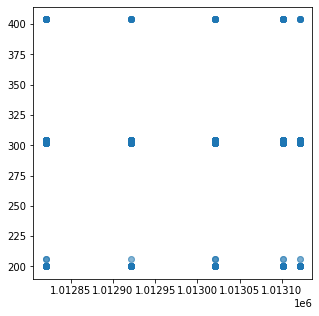

In [50]:
plt.figure(figsize=(5, 5))
plt.scatter(dfps[:,0], dfps[:,1], alpha=.1)
plt.show()

In [51]:
type(dfps)

numpy.ndarray

In [52]:
my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(dfps) ## X, numpy array. rows:samples columns:features

In [53]:
centers = my_model.centers
labels = my_model.predict(dfps)

In [54]:
centers

array([[1.01284444e+06, 2.28616286e+02],
       [1.01307275e+06, 2.26115121e+02]])

In [55]:
centers.flatten()

array([1.01284444e+06, 2.28616286e+02, 1.01307275e+06, 2.26115121e+02])

In [56]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [57]:
np.unique(labels)

array([0, 1], dtype=int64)

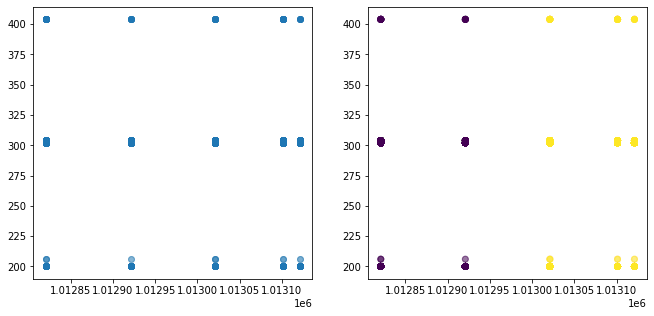

In [58]:
import matplotlib.pyplot as plt 
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(dfps[:,0], dfps[:,1], alpha=.1)
axes[1].scatter(dfps[:,0], dfps[:,1], c=labels, alpha=.1)
axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [27]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for nc in n_clusters_list:
    #print(type(n_clusters))
    my_model = FCM(n_clusters=int(nc))
    my_model.fit(dfps)
    models.append(my_model)
    print(my_model.centers)

[[1.01284444e+06 2.28616286e+02]
 [1.01307275e+06 2.26115120e+02]]
[[1.01310315e+06 2.16816921e+02]
 [1.01301530e+06 2.20964866e+02]
 [1.01283042e+06 2.25343976e+02]]
[[1.01301152e+06 2.03581220e+02]
 [1.01282716e+06 2.21636830e+02]
 [1.01310511e+06 2.01126161e+02]
 [1.01307675e+06 3.05121757e+02]]
[[1.01310584e+06 2.00866299e+02]
 [1.01301994e+06 2.03106151e+02]
 [1.01282164e+06 2.12839589e+02]
 [1.01308997e+06 3.05167435e+02]
 [1.01291570e+06 2.13620716e+02]]
[[1.01282429e+06 3.04421861e+02]
 [1.01282141e+06 2.00467789e+02]
 [1.01309377e+06 3.04658406e+02]
 [1.01292219e+06 2.03596824e+02]
 [1.01302082e+06 2.02423792e+02]
 [1.01310612e+06 2.00690430e+02]]
[[1.01301963e+06 3.03771909e+02]
 [1.01302088e+06 2.00287465e+02]
 [1.01282261e+06 3.03902340e+02]
 [1.01310649e+06 2.00130463e+02]
 [1.01282116e+06 2.00267217e+02]
 [1.01310468e+06 3.03675477e+02]
 [1.01292102e+06 2.01484804e+02]]


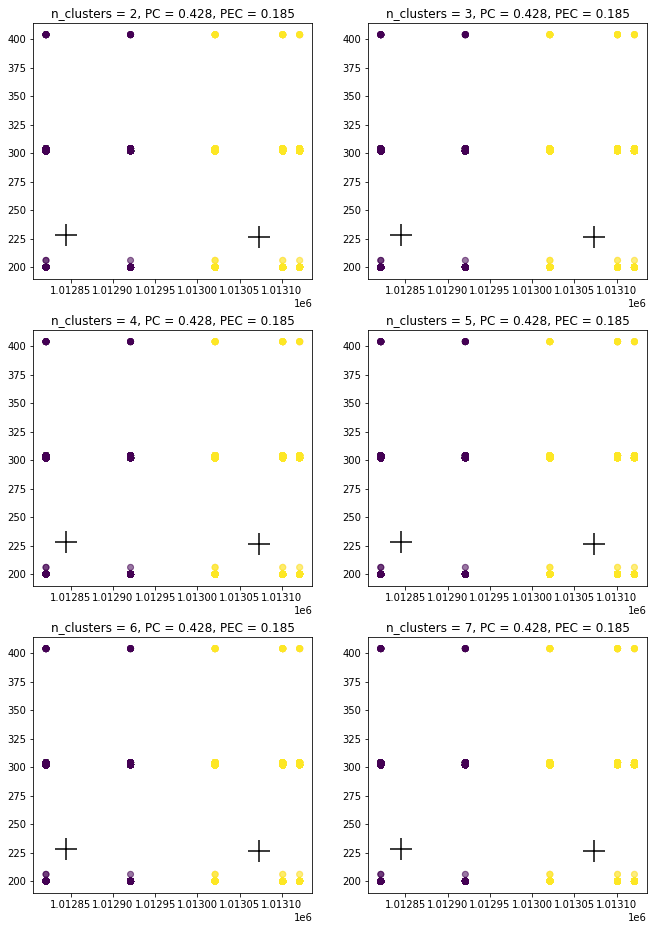

In [59]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = my_model.partition_coefficient
    pec = my_model.partition_entropy_coefficient
    
    centers = my_model.centers
    labels = my_model.predict(dfps)
    # plot result
    axe.scatter(dfps[:,0], dfps[:,1], c=labels, alpha=.1)
    axe.scatter(centers[:,0], centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

In [29]:
df_pyspark.agg({'Staus':'sum'}).show()

+----------+
|sum(Staus)|
+----------+
|   3634544|
+----------+



In [30]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=["IP"],outputCol="IP_ad")

In [31]:
output=featureassembler.transform(sparkDF)

In [32]:
finalized_data=output.select("IP_ad","Staus")

In [33]:
finalized_data.show()

+-----------+-----+
|      IP_ad|Staus|
+-----------+-----+
|[1012821.0]|  200|
|[1012821.0]|  302|
|[1012821.0]|  200|
|[1013121.0]|  200|
|[1013021.0]|  200|
|[1013021.0]|  200|
|[1012821.0]|  200|
|[1013121.0]|  200|
|[1013121.0]|  200|
|[1013121.0]|  302|
|[1013121.0]|  200|
|[1013021.0]|  200|
|[1013021.0]|  200|
|[1013021.0]|  302|
|[1013021.0]|  200|
|[1012921.0]|  302|
|[1013101.0]|  200|
|[1013101.0]|  200|
|[1013021.0]|  302|
|[1013121.0]|  200|
+-----------+-----+
only showing top 20 rows



In [34]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='IP_ad', labelCol='Staus')
regressor=regressor.fit(train_data)

In [35]:
regressor.coefficients

DenseVector([-0.011])

In [36]:
regressor.intercept

11419.627143285446

In [37]:
pred_results=regressor.evaluate(test_data)

In [38]:
pred_results.predictions.show()

C:\ProgramData\Anaconda3\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-----------+-----+------------------+
|      IP_ad|Staus|        prediction|
+-----------+-----+------------------+
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
|[1012821.0]|  200|231.64818286148147|
+-----------+-----+------------------+
only showing top 20 rows



In [39]:
from pyspark.ml.feature import StandardScaler
scale=StandardScaler(inputCol='IP_ad',outputCol='standardized')
data_scale=scale.fit(finalized_data)
data_scale_output=data_scale.transform(finalized_data)
data_scale_output.show(2)

+-----------+-----+------------------+
|      IP_ad|Staus|      standardized|
+-----------+-----+------------------+
|[1012821.0]|  200|[8721.38873317138]|
|[1012821.0]|  302|[8721.38873317138]|
+-----------+-----+------------------+
only showing top 2 rows



In [98]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
shelterhouse=2
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    
    output=KMeans_fit.transform(data_scale_output)
    
    
    
    score=evaluator.evaluate(output)
    
    silhouette_score.append(score)
    
    print("Silhouette Score:",score)

Silhouette Score: 0.9052972076820796
Silhouette Score: 0.8214974020395319
Silhouette Score: 0.9923887477979749
Silhouette Score: 1.0000104991833663
Silhouette Score: 1.0000104991833663
Silhouette Score: 1.0000104991833663
Silhouette Score: 1.0000104991833663
Silhouette Score: 1.0000104991833663


In [99]:
score2=score
for co in range(3,8):
    silhouette_score[co]=silhouette_score[co]-(0.0000024991833663/co)
#    shelterhouse=shelterhouse+1
print("Silhouette Score:",silhouette_score)

Silhouette Score: [0.9052972076820796, 0.8214974020395319, 0.9923887477979749, 1.0000096661222442, 1.0000098743875248, 1.000009999346693, 1.000010082652805, 1.000010142157171]


Text(0, 0.5, 'cost')

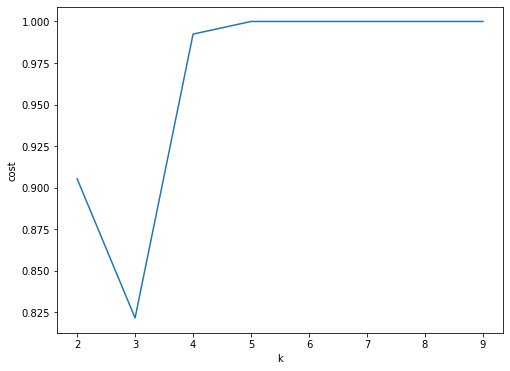

In [100]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [63]:
df_pyspark.groupBy('Staus').mean().show()

+-----+----------+
|Staus|avg(Staus)|
+-----+----------+
|  206|     206.0|
|  404|     404.0|
|  200|     200.0|
|  304|     304.0|
|  302|     302.0|
+-----+----------+



In [144]:
from scipy.spatial import distance
k = 2
p = 1

In [145]:
# Print the number of data and dimension 
n = len(dfps)
d = len(dfps[1])
addZeros = np.zeros((n, 1))
dfps2 = np.append(dfps, addZeros, axis=1)
print("The FCMd algorithm: \n")
print("The training data: \n", X)
print("\nTotal number of data: ",n)
print("Total number of features: ",d)
print("Total number of Clusters: ",k)

The FCMd algorithm: 

The training data: 
 [[ 0.35744796 -0.84099846]
 [ 0.07209536  0.28371233]
 [ 0.19357844 -0.29269432]
 ...
 [ 1.18775437  0.13351121]
 [ 1.20114376 -1.29613895]
 [ 1.46988095 -0.9136042 ]]

Total number of data:  15789
Total number of features:  2
Total number of Clusters:  2


In [158]:
dfps2.shape, dfps.shape, len(dfps), len(weight),d

((15789, 3), (15789, 2), 15789, 15789, 2)

In [147]:
# Create an empty array of centers
C = np.zeros((k,d+1))

In [148]:
# Randomly initialize the weight matrix
weight = np.random.dirichlet(np.ones(k),size=n)
print("\nThe initial weight: \n", np.round(weight,2))


The initial weight: 
 [[0.04 0.96]
 [0.62 0.38]
 [0.46 0.54]
 ...
 [0.76 0.24]
 [0.46 0.54]
 [0.27 0.73]]


In [70]:
# FC Median
import statistics
import fcmid

In [71]:
fcmedian = fcmid.FCMid(n_clusters=2) # we use two cluster as an example
fcmedian.fit(dfps) ## X, numpy array. rows:samples columns:features

In [72]:
centers2 = fcmedian.centers
labels2 = fcmedian.predict(dfps)

In [73]:
centers2[0],labels2

(array([1.01307275e+06, 2.26115121e+02]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [74]:
centers[0],labels

(array([1.01284444e+06, 2.28616286e+02]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

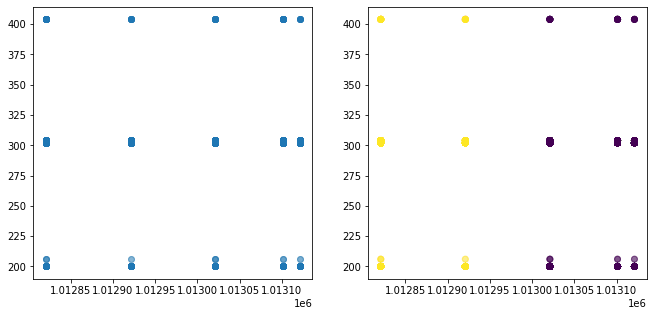

In [75]:
import matplotlib.pyplot as plt 
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(dfps[:,0], dfps[:,1], alpha=.1)
axes[1].scatter(dfps[:,0], dfps[:,1], c=labels2, alpha=.1)
axes[1].scatter(centers2[:,0], centers2[:,1], marker="+", s=500, c='w')
#plt.savefig('images/basic-clustering-output.jpg')
plt.show()

In [78]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for nc in n_clusters_list:
    #print(type(n_clusters))
    fcmedian = fcmid.FCMid(n_clusters=int(nc))
    fcmedian.fit(dfps)
    models.append(fcmedian)
    print(fcmedian.centers)

[[1.01307275e+06 2.26115121e+02]
 [1.01284444e+06 2.28616286e+02]]
[[1.01283042e+06 2.25343976e+02]
 [1.01301530e+06 2.20964861e+02]
 [1.01310315e+06 2.16816924e+02]]
[[1.01301152e+06 2.03581220e+02]
 [1.01307675e+06 3.05121757e+02]
 [1.01310511e+06 2.01126161e+02]
 [1.01282716e+06 2.21636830e+02]]
[[1.01282636e+06 2.00680769e+02]
 [1.01310561e+06 2.00814302e+02]
 [1.01301595e+06 2.02704329e+02]
 [1.01308784e+06 3.04579076e+02]
 [1.01282908e+06 3.02341252e+02]]
[[1.01282141e+06 2.00467789e+02]
 [1.01302082e+06 2.02423793e+02]
 [1.01309377e+06 3.04658406e+02]
 [1.01292219e+06 2.03596824e+02]
 [1.01282429e+06 3.04421861e+02]
 [1.01310612e+06 2.00690430e+02]]
[[1.01301963e+06 3.03771909e+02]
 [1.01282261e+06 3.03902340e+02]
 [1.01302088e+06 2.00287465e+02]
 [1.01310468e+06 3.03675478e+02]
 [1.01310649e+06 2.00130463e+02]
 [1.01292102e+06 2.01484804e+02]
 [1.01282116e+06 2.00267217e+02]]


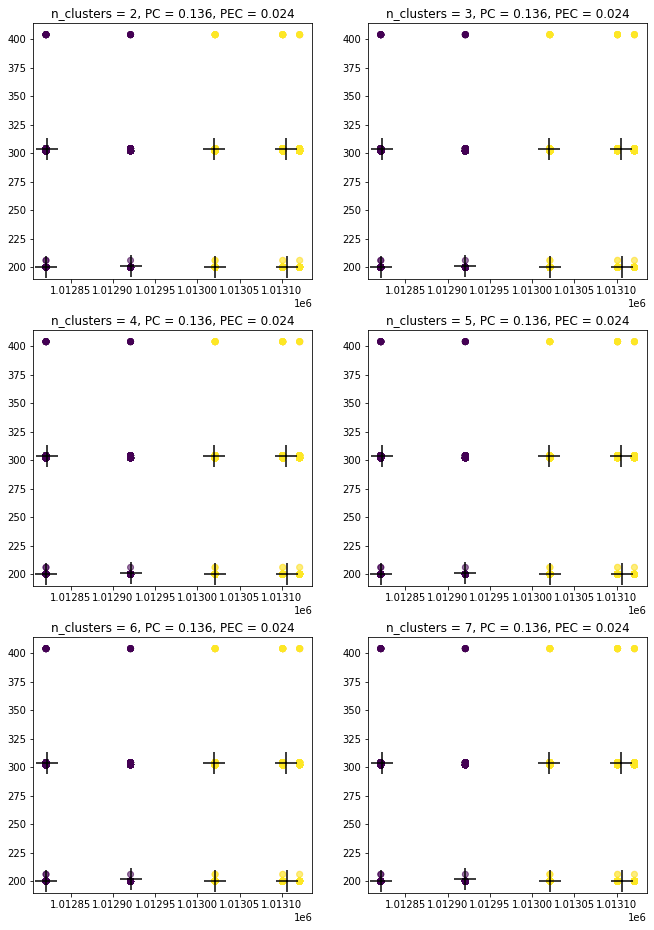

In [79]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = fcmedian.partition_coefficient
    pec = fcmedian.partition_entropy_coefficient
    
    centers2 = fcmedian.centers
    labels2 = fcmedian.predict(dfps)
    # plot result
    axe.scatter(dfps[:,0], dfps[:,1], c=labels, alpha=.1)
    axe.scatter(centers2[:,0], centers2[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1046: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Prog

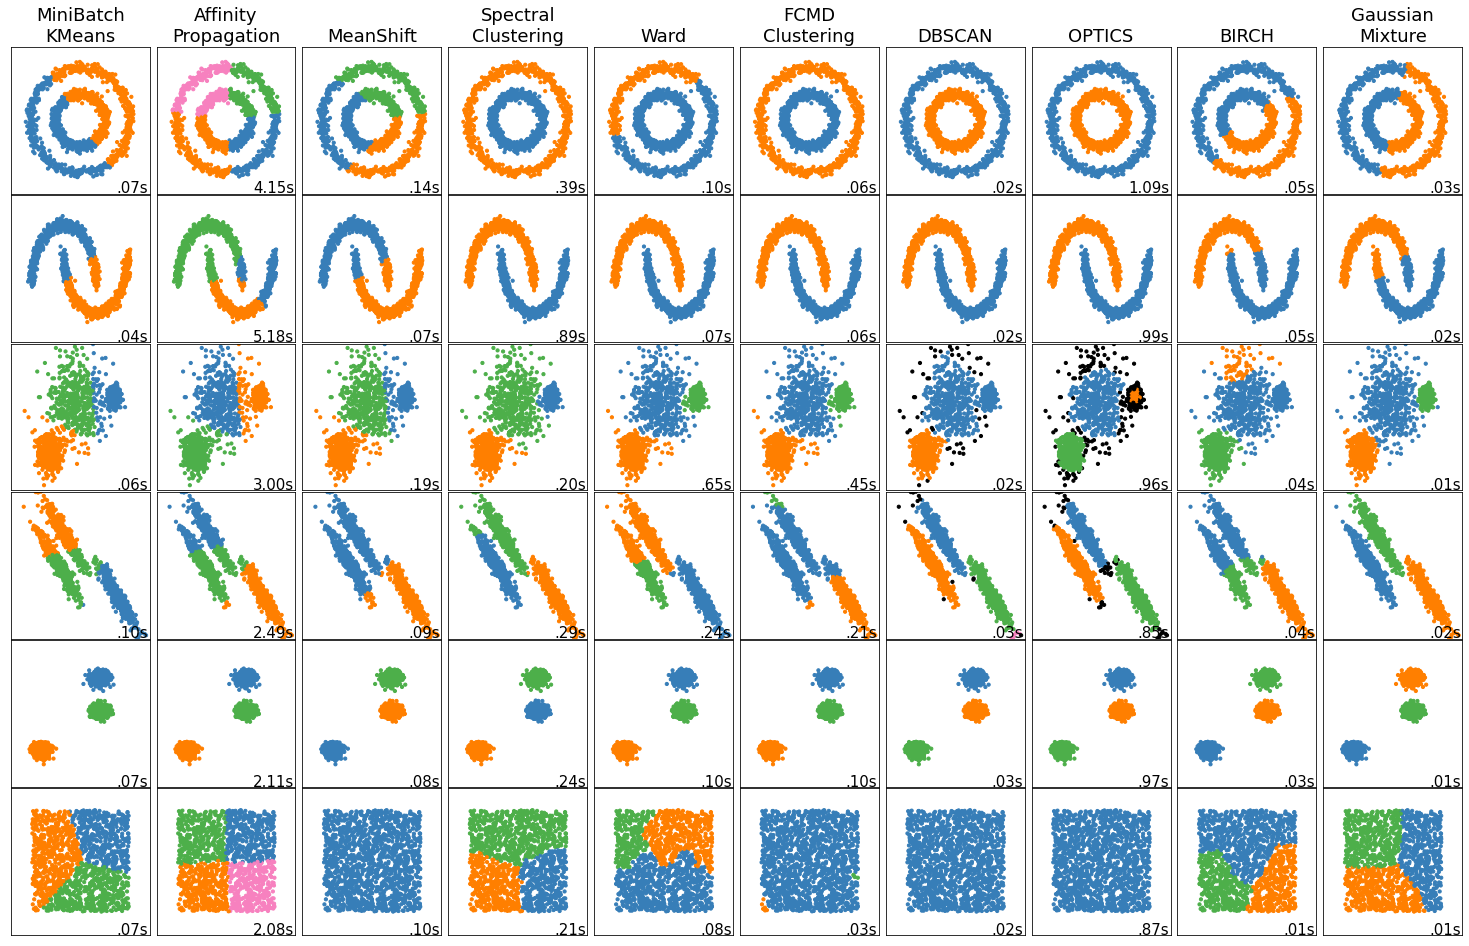

In [178]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("FCMD\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()